In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [14]:
data = pd.DataFrame({
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Quiz_Score': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'Study_Group' : [0,0,1,1,1,1,0,1,0,1],
    'Extra_Curriculars' : [2,1,3,2,4,3,1,2,1,3],
    'Pass/Fail': ['Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail','Pass']
})

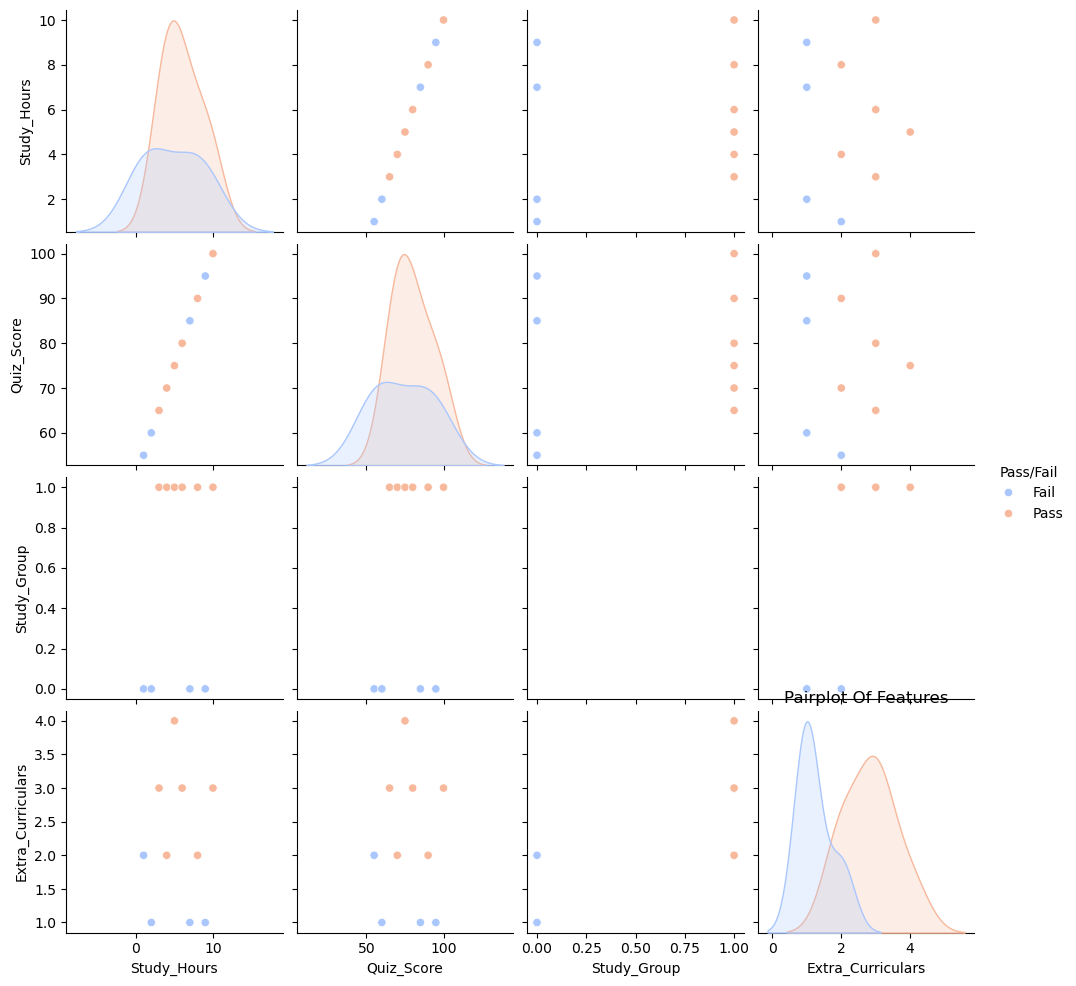

In [16]:
sns.pairplot(data, hue = 'Pass/Fail', palette = 'coolwarm')
plt.title("Pairplot Of Features")
plt.show()

In [18]:
quiz_scores = data['Quiz_Score']
mean_score = np.mean(quiz_scores)
median_score = np.median(quiz_scores)
mode_score = data['Quiz_Score'].mode()[0]

In [20]:
print(f"Mean score {mean_score}")
print(f"Median score {median_score}")
print(f"Mode score {mode_score}")

Mean score 77.5
Median score 77.5
Mode score 55


In [24]:
X_class = data[["Study_Hours", "Study_Group", "Extra_Curriculars"]]
y_class = data["Pass/Fail"].map({'Fail' : 0, 'Pass' : 1})
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = 0.3, random_state = 42)

In [28]:
X_reg = data[["Study_Hours"]]
y_reg = data["Quiz_Score"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = 0.3, random_state = 42)

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_class, y_train_class)
y_test_pred_class = knn.predict(X_test_class)
print(f"KNN accuracy: {accuracy_score(y_test_class, y_test_pred_class):.2f}")

KNN accuracy: 0.33


In [44]:
underfit_tree = DecisionTreeClassifier(max_depth = 1, random_state = 42)
underfit_tree.fit(X_train_class, y_train_class)
y_test_pred_underfit = underfit_tree.predict(X_test_class)
print(f"Underfitting decision tree accuracy {accuracy_score(y_test_class, y_test_pred_underfit):.2f}")

Underfitting decision tree accuracy 1.00


In [46]:
overfit_tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
overfit_tree.fit(X_train_class, y_train_class)
y_test_pred_overfit = overfit_tree.predict(X_test_class)
print(f"Overfitting decision tree accuracy {accuracy_score(y_test_class, y_test_pred_overfit):.2f}")

Overfitting decision tree accuracy 1.00


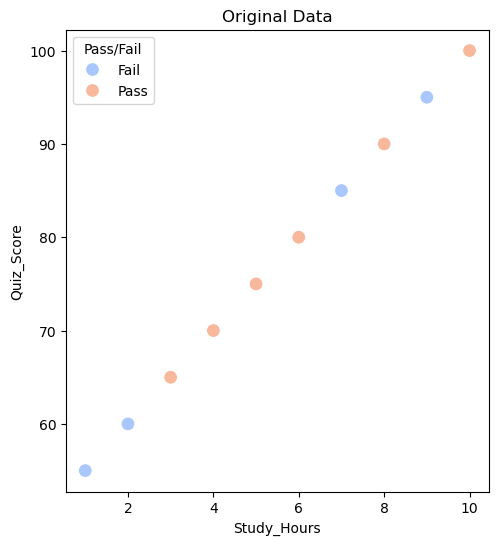

In [50]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = data, x = "Study_Hours", y = "Quiz_Score", hue = "Pass/Fail", palette = "coolwarm", s = 100)
plt.title("Original Data")
plt.show()

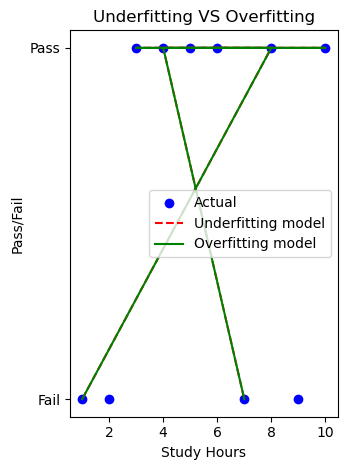

In [52]:
plt.subplot(1,2,2)
plt.scatter(X_class['Study_Hours'], y_class.map({0 : 'Fail', 1 : 'Pass'}), color = 'blue', label = "Actual")
plt.plot(X_train_class['Study_Hours'], underfit_tree.predict(X_train_class), color = "red", label = "Underfitting model", linestyle = "--")
plt.plot(X_train_class['Study_Hours'], overfit_tree.predict(X_train_class), color = "green", label = "Overfitting model", linestyle = "-")
plt.xlabel("Study Hours")
plt.ylabel("Pass/Fail")
plt.legend()
plt.title("Underfitting VS Overfitting")
plt.tight_layout()
plt.show()